In [127]:
import numpy as np
import pandas as pd
import string 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#systeme
import sys
sys.setrecursionlimit(200000)

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

#import warnings; warnings.simplefilter('ignore')

import re
import string

#import spacy
#from spacy_lefff import lefffLemmatizer

from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

import fr_core_news_sm
nlp = fr_core_news_sm.load()

#Visualisation
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#Parametres generaux d'affichage des graphiques
plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['font.size'] = 15


#%load_ext Cython

#wolf
#from frenetic.packet import *
#fwn = FreNetic("C:/Users/Utilisateur/Desktop/simplon/projetA1/wolf.xml") 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [126]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)

<h1 align='center'> Traitement du langage naturel </h1>
<h2 align='center'> Analyse lexicale de sentiment de tweets</h2>
<br>
<br>
<hr>
<h2 align='center'><strong>1ere Partie: </strong>Pre-processing</h2>

### 1/ Import du csv

In [2]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [3]:
tweets = pd.read_csv("./french-tweets-politique/tweets_unique.csv")

In [4]:
tweets.head()

,Unnamed: 0,date,text,hashtags
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NaN
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NaN
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NaN
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NaN
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"['Macron', 'Bellatar', 'ConseilDesVilles']"


In [5]:
tweets.rename(columns={'Unnamed: 0':'num'}, inplace=True)

In [6]:
tweets.head()

,num,date,text,hashtags
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NaN
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NaN
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NaN
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NaN
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"['Macron', 'Bellatar', 'ConseilDesVilles']"


In [7]:
tw = tweets.copy()

### 2/ Normalisation du texte

In [8]:
low = lambda x: str(x).lower()
tweets['text'] = tweets.text.apply(low)
tweets.head()

,num,date,text,hashtags
0,0,Sun Mar 18 13:45:13 +0000 2018,au lieu d'expulser des diplomates russes il eu...,NaN
1,1,Sun Mar 18 15:47:19 +0000 2018,"selon l’ex ambassadeur anglais en ouzbékistan,...",NaN
2,2,Sun Mar 18 11:48:32 +0000 2018,@philipj37 @eugeniebastie tellement vrai.\r\ns...,NaN
3,3,Sun Mar 18 15:41:24 +0000 2018,"bombe: le capitaine barril, ancien commandant ...",NaN
4,4,Sun Mar 18 14:32:39 +0000 2018,dans la même semaine #macron nomme le très amb...,"['Macron', 'Bellatar', 'ConseilDesVilles']"


### 3/ Supression des caracteres speciaux et double espaces

In [9]:
#tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:’).";,?&%=>(<''©-]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'].head()

0    au lieu d'expulser des diplomates russes il eu...
1    selon l’ex ambassadeur anglais en ouzbékistan,...
2    @philipj37 @eugeniebastie tellement vrai.\r\ns...
3    bombe: le capitaine barril, ancien commandant ...
4    dans la même semaine #macron nomme le très amb...
Name: text, dtype: object

In [10]:
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])
tweets['text'].head()

0    au lieu d'expulser des diplomates russes il eu...
1    selon l’ex ambassadeur anglais en ouzbékistan,...
2    tellement vrai. s'occuper de trump et de pouti...
3    bombe: le capitaine barril, ancien commandant ...
4    dans la même semaine #macron nomme le très amb...
Name: text, dtype: object

### 4/ Tokénisation

In [11]:
tweets.dtypes

num         object
date        object
text        object
hashtags    object
dtype: object

In [12]:
tweets['text'].astype('str', inplace=True).head()

0    au lieu d'expulser des diplomates russes il eu...
1    selon l’ex ambassadeur anglais en ouzbékistan,...
2    tellement vrai. s'occuper de trump et de pouti...
3    bombe: le capitaine barril, ancien commandant ...
4    dans la même semaine #macron nomme le très amb...
Name: text, dtype: object

In [13]:
clean = lambda tx: word_tokenize(tx)
tweets.text = tweets.text.apply(clean)
tweets.text.head()

0    [au, lieu, d'expulser, des, diplomates, russes...
1    [selon, l, ’, ex, ambassadeur, anglais, en, ou...
2    [tellement, vrai, ., s'occuper, de, trump, et,...
3    [bombe, :, le, capitaine, barril, ,, ancien, c...
4    [dans, la, même, semaine, #, macron, nomme, le...
Name: text, dtype: object

### 5/ Stop-Words

In [14]:
stopW = stopwords.words('french')
punc = string.punctuation
#print(stopW)
filtered_sentence = [w for w in tweets['text'] if not w in stopW] 
# remove URLs, RTs, and twitter handles
# for i in range(len(filtered_sentence)):
#     filtered_sentence[i] =" ".join([word for word in filtered_sentence[i]
#                                if 'http' not in word  and '<' not in word])
filtered_sentence[0]
#stopW = stopW.extend(punc)
stopW.extend(punc)
print(stopW)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront',

In [15]:
def filtration(tk: list ):#texte tokenisé sous format de liste
    l_filtree = []
    for word in tk:
        word = word.strip()
        if word not in stopW:
            l_filtree.append(str(word))
    return l_filtree

In [16]:
filtered_sentence = tweets['text'].apply(filtration)
filtered_sentence.head()

0    [lieu, d'expulser, diplomates, russes, plus, c...
1    [selon, ’, ex, ambassadeur, anglais, ouzbékist...
2    [tellement, vrai, s'occuper, trump, poutine, c...
3    [bombe, capitaine, barril, ancien, commandant,...
4    [semaine, macron, nomme, très, ambigu, l'islam...
Name: text, dtype: object


### 6/ Lemmatisation

In [17]:
#fonction de lemmatisation
def lemma(l:list):
    new_l = ''
    for word in l:
        new_l += ' '+word
    # strip retire les espaces au debut et a la fin de la chaine de caractere
    new_l = new_l.strip()
    n = nlp(new_l)
    # boucle sur n et applique la fonction lemma_ sur chacun des tokens
    x = []
    for z in n:
        x.append(z.lemma_)
    return x

In [18]:
tweetslemma = filtered_sentence.apply(lemma)

In [19]:
tweetslemma.head()

0    [lieu, de, expulser, diplomate, russe, plus, c...
1    [selon, ’, ex, ambassadeur, anglais, ouzbékist...
2    [tellement, vrai, si, occuper, trump, poutin, ...
3    [bombe, capitaine, barril, ancien, commander, ...
4    [semaine, macron, nommer, très, ambigu, le, is...
Name: text, dtype: object

In [50]:
tweetslemma = tweetslemma.apply(filtration)
tweetslemma.head()

0    [lieu, expulser, diplomate, russe, plus, concr...
1    [selon, ’, ex, ambassadeur, anglais, ouzbékist...
2    [tellement, vrai, si, occuper, trump, poutin, ...
3    [bombe, capitaine, barril, ancien, commander, ...
4    [semaine, macron, nommer, très, ambigu, islami...
Name: text, dtype: object

<br>
<br>
<hr>
<h2 align='center'><b>2eme Partie: </b>Attribution d'un taux de polarite de sentiment</h2>

### 1/ Agregation des donnees

In [21]:
# Import du fichier Feel.csv
fe = pd.read_csv('./nlp_fr/FEEL.csv', sep=';', encoding='utf-8')
fe.set_index('word', inplace=True)
fe = fe[['polarity']]
fe.head(5)

,polarity
word,
à ce endroit là,positive
à le hâte,negative
à part,negative
à pic,negative
à rallonge,negative


In [22]:
#import motsJoyeux et motNegatifs
with open('motsJoyeux', 'r', encoding='utf-8-sig', ) as f:
    x = f.read().split(',')
motsJoyeux = [mot.lower().strip() for mot in x]
p = pd.Series('positif', index=motsJoyeux)
p = p.to_frame().rename(columns={0:'polarity'})


with open('motsNegatifs', 'r', encoding='utf-8-sig') as f:
    x = f.read().split(',')
motsNegatifs = [mot.lower().strip() for mot in x]
n = pd.Series('negatif', index=motsNegatifs)
n = n.to_frame().rename(columns={0:'polarity'})

p.head()

,polarity
à bas prix,positif
à couper le souffle,positif
à croissance rapide,positif
à être vu,positif
à juste titre,positif


In [23]:
# Aggregation des donnees
f = fe.copy()
print(len(f))
f = pd.concat([f,p], axis=0)
print(len(f))
f = pd.concat([f,n], axis=0)
print(len(f))
print(f.index.value_counts().head()) 
f.head()

14127
15627
15783
paisible    3
mauvais     3
fier        3
fermeté     3
honneur     3
dtype: int64


,polarity
à ce endroit là,positive
à le hâte,negative
à part,negative
à pic,negative
à rallonge,negative


In [24]:
print(len(f.groupby(f.index).first())== len(f[~f.index.duplicated(keep='first')]))

True


In [25]:
print(f.index.value_counts().head()) 

paisible    3
mauvais     3
fier        3
fermeté     3
honneur     3
dtype: int64


In [26]:
#Transformer le df pol en deux listes
pP = set(f[f['polarity']=='positive'].index.values)
pN = set(f[f['polarity']=='negative'].index.values)

In [27]:
pN = [w.strip() for w in pN]

### 2/ Fonction de calcul des polarite

In [28]:
def calculpolarite(text: str):
    scoreP = [True for word in text if word in pP].count(True)
    scoreN = [True for word in text if word in pN].count(True)
    if(scoreP>scoreN):
        p = 'positif'
        s = "{0:.2f}".format(scoreP/(scoreN+scoreP))
    elif(scoreP==scoreN):
        p= 'neutre'
        s=0
    else:
        p= 'negatif' 
        s ="{0:.2f}".format(scoreN/(scoreN+scoreP))
    return [p,s]

In [29]:
# test pour nouvelle fonction
rs =list(tweetslemma[:5].apply(calculpolarite))

In [30]:
# Suite test
rs = np.array(rs)
rs[:,1]

array(['0.71', '0.70', '0', '0', '0.75'], dtype='<U7')

In [31]:
polarite = list(tweetslemma.apply(calculpolarite))
polarite = np.array(polarite)

In [32]:
tweets['sentiment'] = polarite[:,0]
tweets['taux']= polarite[:,1]
tweets.head()

,num,date,text,hashtags,sentiment,taux
0,0,Sun Mar 18 13:45:13 +0000 2018,"[au, lieu, d'expulser, des, diplomates, russes...",NaN,positif,0.71
1,1,Sun Mar 18 15:47:19 +0000 2018,"[selon, l, ’, ex, ambassadeur, anglais, en, ou...",NaN,positif,0.70
2,2,Sun Mar 18 11:48:32 +0000 2018,"[tellement, vrai, ., s'occuper, de, trump, et,...",NaN,neutre,0
3,3,Sun Mar 18 15:41:24 +0000 2018,"[bombe, :, le, capitaine, barril, ,, ancien, c...",NaN,neutre,0
4,4,Sun Mar 18 14:32:39 +0000 2018,"[dans, la, même, semaine, #, macron, nomme, le...","['Macron', 'Bellatar', 'ConseilDesVilles']",positif,0.75


In [33]:
# from collections import Counter

# def evaltweet(s:list):
#     pola = [' '.join(pol[pol.word == e].polarity) for e in s]
#     pola = Counter(pola)
#     polap = pola.get('positive', 0)
#     polan = pola.get('negative', 0)
#     return '¯\\_(ツ)_/¯' if (polap + polan) == 0 else {'positif':polap / (polap + polan), 'negatif':polan / (polap + polan)}

In [34]:
# def evaltweet2(s:list):
#     pola = [' '.join(pol[pol.word == e].polarity) for e in s]
#     pola = Counter(pola)
#     polap = pola.get('positive', 0)
#     polan = pola.get('negative', 0)
#     if (polap == polan):
#         p = 'neutre'
#     elif (polap>polan):
#         p= 'positif'
#     else:
#         p= 'negatif'
#     return p

In [35]:
# def help_apply():
#     # de 0 a 7328, boucler tous les 1000
#     deb = 0
#     fin = 500
#     polarite = []
#     for i in range(16):
#         polarite.append(tweetslemma[deb:fin].apply(evaltweet2))
#         deb += 500
#         fin += 500
#         if(fin>7328):
#             fin = 7328
#     return polarite

In [36]:
# tweets['processed_text'] = tweetslemma
# tweets.head()

In [37]:
tweetslemma.shape

(7327,)

## Preparation des donnees pour l'export

In [38]:
# for i in pol.word:
#     if (tweets.text[0].find(i)) != -1:
#         print("Ce tweet contient [" + i + "] avec la polarité: " + pol.polarity)

In [39]:
tweets.hashtags.replace("[][']", '', regex=True, inplace=True)

In [68]:
textjoin = lambda l : ','.join([w.strip() for w in l])
t = tweetslemma.apply(textjoin)
tweets['words'] = t

In [69]:
tweets.head()

,num,date,text,hashtags,sentiment,taux,words
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NO HASHTAG,positif,0.71,"lieu,expulser,diplomate,russe,plus,concret,plu..."
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NO HASHTAG,positif,0.70,"selon,’,ex,ambassadeur,anglais,ouzbékistan,``,..."
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NO HASHTAG,neutre,0,"tellement,vrai,si,occuper,trump,poutin,être,te..."
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NO HASHTAG,neutre,0,"bombe,capitaine,barril,ancien,commander,gign,«..."
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"Macron, Bellatar, ConseilDesVilles",positif,0.75,"semaine,macron,nommer,très,ambigu,islamisme,be..."


In [70]:
#Recuperer la colonne text du df de depart
tweets['text'] = tw.text
tweets.head()

,num,date,text,hashtags,sentiment,taux,words
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NO HASHTAG,positif,0.71,"lieu,expulser,diplomate,russe,plus,concret,plu..."
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NO HASHTAG,positif,0.70,"selon,’,ex,ambassadeur,anglais,ouzbékistan,``,..."
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NO HASHTAG,neutre,0,"tellement,vrai,si,occuper,trump,poutin,être,te..."
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NO HASHTAG,neutre,0,"bombe,capitaine,barril,ancien,commander,gign,«..."
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"Macron, Bellatar, ConseilDesVilles",positif,0.75,"semaine,macron,nommer,très,ambigu,islamisme,be..."


In [71]:
#Remplace les nan par NO HASHTAG
tweets.hashtags.replace(np.nan, 'NO HASHTAG' ,inplace=True)
tweets.head()

,num,date,text,hashtags,sentiment,taux,words
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NO HASHTAG,positif,0.71,"lieu,expulser,diplomate,russe,plus,concret,plu..."
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NO HASHTAG,positif,0.70,"selon,’,ex,ambassadeur,anglais,ouzbékistan,``,..."
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NO HASHTAG,neutre,0,"tellement,vrai,si,occuper,trump,poutin,être,te..."
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NO HASHTAG,neutre,0,"bombe,capitaine,barril,ancien,commander,gign,«..."
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"Macron, Bellatar, ConseilDesVilles",positif,0.75,"semaine,macron,nommer,très,ambigu,islamisme,be..."


In [44]:
# Export du df en CSV
tweets.to_csv("tweetsAnalyse.csv", index=False, encoding='utf-8')

## Fonction de determination de polarite a partir d'un texte

In [45]:
# The function polarity_feeling takes a string as entry and returns the text's feeling polarity: 'neutre', 'positif' or 'negatif'
# and the rate in a list. 
def polarity_feeling(text: str):
    # text to lower case 
    # delete punctuation
    #text =re.sub('[!@#$:’).";,?&%=>(<''©-]', '', str(text).lower())
    # delete doubble whitespace
    text = re.sub('  ', ' ', text)
    # delete @, > and 'http'
    text = " ".join([word for word in text.split()
                                if 'http' not in word and '@' not in word and '<' not in word])
    # Tokenisation
    text = word_tokenize(text)
    text = filtration(text)

    # Lemmatization
    text = lemma(text)
    # delete stopwords
    text = filtration(text)
    # define the feeling polarity 
    return calculpolarite(text)
    
    

In [46]:
polarity_feeling('Vive l\'administration française. Elle est belle!')

['neutre', 0]

In [47]:
tw.head()

,num,date,text,hashtags
0,0,Sun Mar 18 13:45:13 +0000 2018,Au lieu d'expulser des diplomates Russes il eu...,NaN
1,1,Sun Mar 18 15:47:19 +0000 2018,"Selon l’ex Ambassadeur anglais en Ouzbékistan,...",NaN
2,2,Sun Mar 18 11:48:32 +0000 2018,@PhilipJ37 @EugenieBastie Tellement vrai.\r\nS...,NaN
3,3,Sun Mar 18 15:41:24 +0000 2018,"BOMBE: Le capitaine Barril, ancien commandant ...",NaN
4,4,Sun Mar 18 14:32:39 +0000 2018,Dans la même semaine #Macron nomme le très amb...,"['Macron', 'Bellatar', 'ConseilDesVilles']"


In [48]:
_pol = tw[:5].text.apply(polarity_feeling)

In [49]:
_pol

0    [positif, 0.69]
1    [positif, 0.57]
2        [neutre, 0]
3    [positif, 0.60]
4    [positif, 0.75]
Name: text, dtype: object

<h2 align='center'>Frequence des mots utilises dans le corpus</h2>

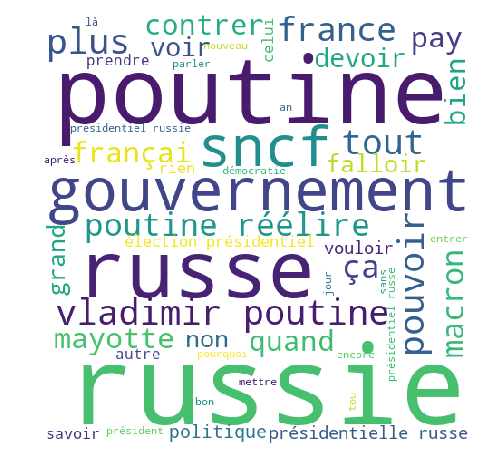

In [128]:
def wordcloud(tweets,col):
    stopW.extend(['avoir','être','si','faire','via','dire','aller','alors','comme','quel','donc','aussi'])
    set(stopW)
    wordcloud = WordCloud(background_color="white",stopwords=stopW,random_state = 2016,max_words=50,width=480, height=480, margin=0).generate(" ".join([i for i in tweets['words']]))
    plt.figure( figsize=(15,8))
    #plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.title("Tweets politiques")
    plt.margins(x=0, y=0)
    plt.show()
wordcloud(tweets,'text')  